In [1]:
import rdflib
from rdflib import Namespace , Literal , URIRef
from rdflib.namespace import RDF , RDFS

# bind the uncommon namespaces
wd = Namespace("http://www.wikidata.org/entity/") # remember that a prefix matches a URI until the last slash (or hashtag #)
wdt = Namespace("http://www.wikidata.org/prop/direct/")
art = Namespace("https://w3id.org/artchives/")

# create an empty Graph
g = rdflib.ConjunctiveGraph()

# parse a local RDF file by specifying the format
result = g.parse("C:\\Users\\bordi\\OneDrive\\Desktop\\epds\\2021-2022\\resources\\artchives.nq", format='nquads')

In [22]:
#What are the most referenced people in ARTchives archival collections?
query_people = g.query(
    """
    PREFIX wd: <http://www.wikidata.org/entity/>
    PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
    PREFIX wdt: <http://www.wikidata.org/prop/direct/>
    SELECT  ?person (SAMPLE(?label) AS ?person_label) (SAMPLE(?coll_label) AS ?coll)x (SAMPLE(?label) AS ?period_label)
    WHERE {
        ?coll <https://w3id.org/artchives/hasSubjectPeople> ?person ; 
              rdfs:label ?coll_label .
        ?person rdfs:label ?person_label .
    }
    GROUP BY ?period ?coll 
	ORDER BY ?person_label""")

ParseException: Expected {SelectQuery | ConstructQuery | DescribeQuery | AskQuery}, found 'x'  (at char 246), (line:5, col:85)

In [19]:
# import csv built-in library
import csv

# prepare the csv file
with open('people_count.csv', mode='w', encoding='utf-8') as my_file:
    my_writer = csv.writer(my_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_ALL)
    # write the column names
    my_writer.writerow(['person', 'person_label'])
    
    # access the list of tuples of the query results
    for res in query_people:
        # write in the csv
        my_writer.writerow([res['person'], res['person_label'].strip()])

In [20]:
# parse the csv into a dataframe
import pandas as pd
df = pd.read_csv("people_count.csv", encoding="latin-1")
df.head()

,person,person_label
0,http://www.wikidata.org/entity/Q1296486,Wolfgang Lotz
1,http://www.wikidata.org/entity/Q64607,Wilhelm von Bode
2,http://www.wikidata.org/entity/Q1715096,Ulrich Middeldorf
3,http://www.wikidata.org/entity/Q1361667,Roberto Longhi
4,http://www.wikidata.org/entity/Q90407,Richard Krautheimer


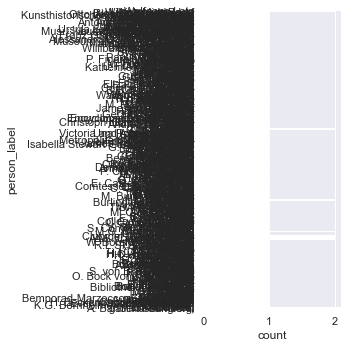

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Apply the default theme
# sns.set_theme() in older versions of seaborn
sns.set()

# rename data frame
people = df

# count function to show the number of observations of a category (period_label) in a dataset as a bar chart
# see documentation here https://seaborn.pydata.org/generated/seaborn.catplot.html
my_plot = sns.catplot(y="person_label", kind="count", data=people)